In [3]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [4]:
# 此函數會幫我們把多張影像畫成一張多宮格圖
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

In [5]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

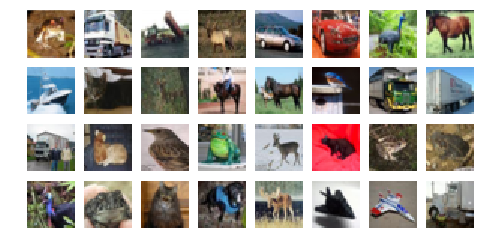

In [6]:
# 取前 32 張圖片做視覺化
images = x_train[:32]
img_combine(images)

In [53]:
# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
    vertical_flip=True)

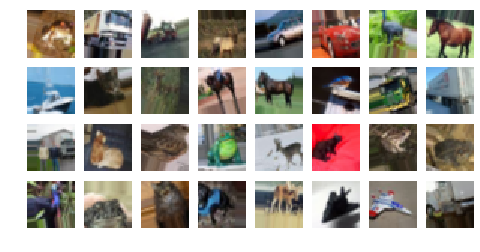

In [8]:
# 注意！！ ImageDataGenerator 是一個 Generator (生成器)! 對 Generator 不熟悉的同學請回到 Day098 做複習。
# 使用 .flow 後，就會對我們的影像進行增強，再 call next 取出 generator 的圖像。(shuffle=False 因為我們希望圖像的順序不要改變，方便觀察。實際訓練時預設是 shuffle=True) 
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int")) # 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int

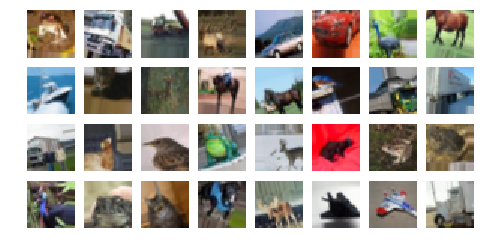

In [9]:
# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

## 作業

請使用 ImageDataGenerator 來進行 Cifar-10 資料集的訓練，並觀察不同的圖像增強方法是否會顯著影響訓練結果

In [20]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam

In [24]:
batch_size = 64 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 10 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 15 # 訓練的 epochs 數量

In [22]:
x_train.shape[1:]

(32, 32, 3)

In [62]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [30]:
num_classes = 10
y_trainC = keras.utils.to_categorical(y_train, num_classes)
y_testC = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [31]:
print(y_testC.shape)
print(x_test.shape)
print(y_trainC.shape)
print(x_train.shape)

(10000, 10)
(10000, 32, 32, 3)
(50000, 10)
(50000, 32, 32, 3)


In [32]:
history = model.fit(x_train, y_trainC,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_testC))
score = model.evaluate(x_test, y_testC, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 7s 148us/step - loss: 1.5578 - acc: 0.4382 - val_loss: 1.3212 - val_acc: 0.5280
Epoch 2/15
50000/50000 [==============================] - 7s 150us/step - loss: 1.1241 - acc: 0.6042 - val_loss: 1.2690 - val_acc: 0.5622
Epoch 3/15
50000/50000 [==============================] - 7s 149us/step - loss: 0.9293 - acc: 0.6757 - val_loss: 1.3197 - val_acc: 0.5538
Epoch 4/15
50000/50000 [==============================] - 8s 150us/step - loss: 0.8150 - acc: 0.7170 - val_loss: 0.8000 - val_acc: 0.7206
Epoch 5/15
50000/50000 [==============================] - 8s 150us/step - loss: 0.7292 - acc: 0.7484 - val_loss: 0.7867 - val_acc: 0.7436
Epoch 6/15
50000/50000 [==============================] - 7s 149us/step - loss: 0.6773 - acc: 0.7664 - val_loss: 0.7319 - val_acc: 0.7545
Epoch 7/15
50000/50000 [==============================] - 7s 149us/step - loss: 0.6412 - acc: 0.7822 - val_loss: 1.0956 - 

In [50]:
keras.backend.clear_session()

In [63]:
history = model.fit_generator(data_generator.flow(x_train,y_trainC),
                    steps_per_epoch=x_train.shape[0],
                    validation_steps=4,
                    verbose=1,
                    epochs=5,
                    validation_data=(x_test,y_testC))
score = model.evaluate(x_test, y_testC, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
50000/50000 [==============================] - 426s 9ms/step - loss: 1.2855 - acc: 0.5668 - val_loss: 1.1569 - val_acc: 0.6000
Epoch 2/5
50000/50000 [==============================] - 425s 9ms/step - loss: 1.7024 - acc: 0.4317 - val_loss: 2.0588 - val_acc: 0.2019
Epoch 3/5
50000/50000 [==============================] - 424s 8ms/step - loss: 2.0881 - acc: 0.2290 - val_loss: 1.8472 - val_acc: 0.2446
Epoch 4/5
50000/50000 [==============================] - 425s 9ms/step - loss: 3.2922 - acc: 0.1907 - val_loss: 1.9698 - val_acc: 0.2005
Epoch 5/5
50000/50000 [==============================] - 425s 8ms/step - loss: 2.2189 - acc: 0.1709 - val_loss: 2.0376 - val_acc: 0.1998
Test loss: 2.0375640117645264
Test accuracy: 0.1998


In [64]:
score = model.evaluate(x_test, y_testC, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.0375640117645264
Test accuracy: 0.1998
